In [15]:
import sys
import time
import numpy as np
sys.path.append('../../lib/')
import matplotlib.pyplot as plt
from frustration_graph import *

In [2]:
from dwave.system import DWaveSampler, FixedEmbeddingComposite
import minorminer
import dimod
import dwave.inspector

ModuleNotFoundError: No module named 'dwave.system'

In [16]:
width = 5.949973986 # in inches
height = 3.850394
ratio = (np.sqrt(5.0) - 1.0) / 2.0

In [4]:
res_path = "../../Results/Ising_Frustrated/"

L = 20
config = np.zeros((L, L))

ratios = np.linspace(0, 1, 50)
strenghts = [1, 10, 20, 1000]
annealing_t = np.linspace(1, 1001, 4)

qpu = DWaveSampler() #'defaults'
bqm = bqm_frustration(L, 1, 0)
emb = minorminer.find_embedding(dimod.to_networkx_graph(bqm), qpu.to_networkx_graph(), threads=12)
sampler = FixedEmbeddingComposite(qpu, embedding=emb)

NameError: name 'DWaveSampler' is not defined

In [ ]:
CS = np.zeros((len(strenghts), len(ratios)))

for i, C in enumerate(strenghts):
    for j, ratio in enumerate(ratios):
        bqm = bqm_frustration(L, ratio, 0)
        sampleset = sampler.sample(bqm, num_reads=50, chain_strength=C,
                                        label=f'Ising Frustrated {i+1}/{ratios.size}')
        
        
        for node, value in sampleset.first.sample.items():
            split = node.split('-')
            x, y = int(split[0]), int(split[1])
            
            config[x, y] = value
        
        CS[i, j] = np.abs(np.mean(config))
        time.sleep(2)

In [64]:
np.save(res_path + "DWave/Chain_Strenghts", CS) 

In [17]:
CS = np.load(res_path + "DWave/Chain_Strenghts.npy")

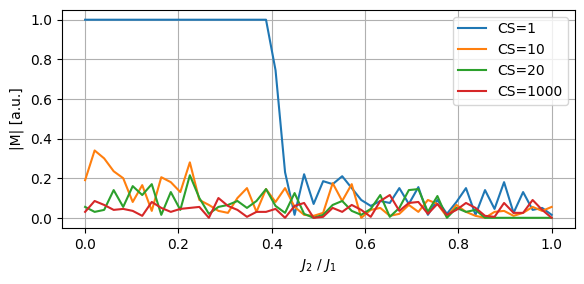

In [6]:
fig = plt.figure(figsize=(width, 0.8* width * ratio))

for i, cs in enumerate(strenghts):
    plt.plot(ratios, np.abs(CS[i, :]), label=f"CS={cs}")

plt.xlabel(r"$J_2$ / $J_1$")
plt.ylabel("|M| [a.u.]")
plt.grid()
plt.legend()
fig.tight_layout()
plt.savefig("../../Images/Ising_Frustrated/Chain_strenght_plots.pdf")

In [32]:
ATs = np.zeros((len(strenghts), len(ratios)))

for i, At in enumerate(annealing_t):
    for j, ratio in enumerate(ratios):
        bqm = bqm_frustration(L, ratio, 0)
        sampleset = sampler.sample(bqm, num_reads=50, annealing_time=At,
                                        label=f'Ising Frustrated {i+1}/{ratios.size}')
        
        
        for node, value in sampleset.first.sample.items():
            split = node.split('-')
            x, y = int(split[0]), int(split[1])
            
            config[x, y] = value
        
        ATs[i, j] = np.mean(config)
        time.sleep(4)

In [52]:
np.save(res_path + "DWave/Annealing_Times", ATs) 

In [18]:
ATs = np.load(res_path + "DWave/Annealing_Times.npy")

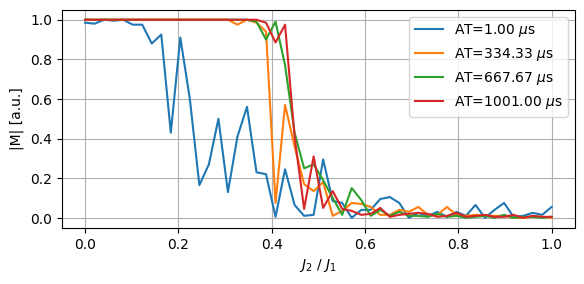

In [8]:
fig = plt.figure(figsize=(width, 0.8* width * ratio))

for i, at in enumerate(annealing_t):
    plt.plot(ratios, np.abs(ATs[i, :]), label=fr"AT={at:.2f} $\mu$s")

plt.xlabel(r"$J_2$ / $J_1$")
plt.ylabel("|M| [a.u.]")
plt.grid()
plt.legend()
fig.tight_layout()
plt.savefig("../../Images/Ising_Frustrated/Annealing_time_plots.pdf")

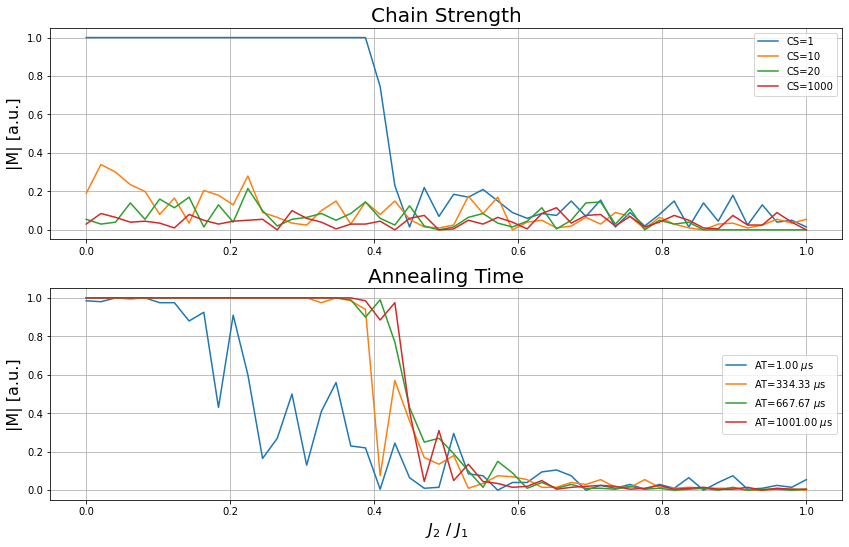

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(2*width, 2*height))

for i, cs in enumerate(strenghts):
    ax[0].plot(ratios, np.abs(CS[i, :]), label=f"CS={cs}")

ax[0].set_ylabel("|M| [a.u.]", fontsize=16)
ax[0].set_title("Chain Strength", fontsize=20)
ax[0].grid()
ax[0].legend()

for i, at in enumerate(annealing_t):
    ax[1].plot(ratios, np.abs(ATs[i, :]), label=fr"AT={at:.2f} $\mu$s")

ax[1].set_xlabel(r"$J_2$ / $J_1$", fontsize=16)
ax[1].set_ylabel("|M| [a.u.]", fontsize=16)
ax[1].set_title("Annealing Time", fontsize=20)
ax[1].grid()
ax[1].legend(loc="right")
plt.tight_layout()
fig.savefig("slide.pdf")

In [36]:
configs = np.zeros((4, L, L))
ratios = [0.2,0.45,0.55,0.8]
for i, ratio in enumerate([0.2,0.45,0.55,0.8]):
    bqm = bqm_frustration(L, ratio, 0)
    sampleset = sampler.sample(bqm, num_reads=50, annealing_time=1000, chain_strength=4,
                                    label=f'Ising Frustrated')
    
    
    for node, value in sampleset.first.sample.items():
        split = node.split('-')
        x, y = int(split[0]), int(split[1])
        
        config[x, y] = value
    
    configs[i, :, :] = config

np.save("../../Results/Ising_Frustrated/DWave/20x20/configs.npy", configs)

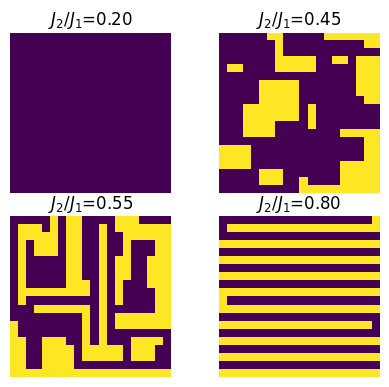

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(width, width * ratio), constrained_layout=True)
fig.set_tight_layout({'pad': 0})

ratios = [0.2,0.45,0.55,0.8]

for i, ax in enumerate(ax.flatten()):
    ax.imshow(configs[i])
    ax.axis('off')
    ax.set_title(fr"$J_2 / J_1$={ratios[i]:0.2f}")
    
#plt.savefig("../../Images/Ising_Frustrated/QPU_configs.pdf",bbox_inches="tight")